iris : 150 individuals, iris_dna : 146 individuals


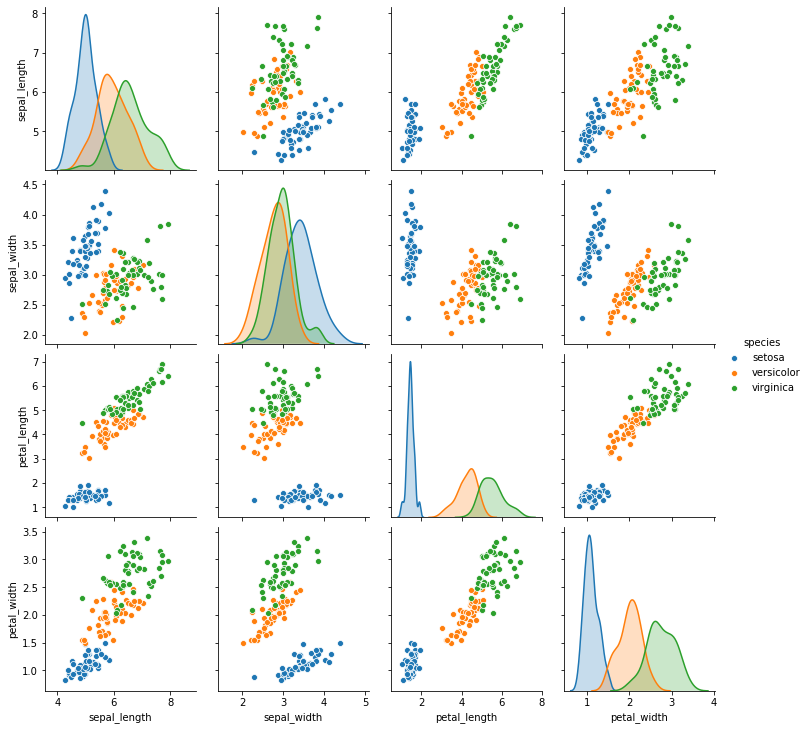

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.138728,3.470118,1.441015,1.094873,setosa
1,4.849873,3.034931,1.414931,0.968687,setosa
2,4.715843,3.239083,1.295309,1.006643,setosa
3,4.603747,NaN,1.480616,1.002344,setosa
4,4.988744,3.645049,1.417527,1.122947,setosa


In [23]:
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns
import numpy as np
iris=pd.read_csv('iris_dataset.csv')
#delete the id column because we wont use it
del iris['id']
iris_dna=iris.dropna(axis=0,how='any')
print("iris : {} individuals, iris_dna : {} individuals".format(len(iris),len(iris_dna)))
sns.pairplot(iris_dna,hue="species")
plot.show()
iris.head()

In [24]:
iris_setosa=iris_dna[iris_dna["species"]=="setosa"]
iris_versicolor=iris_dna[iris_dna["species"]=="versicolor"]
iris_virginica=iris_dna[iris_dna["species"]=="virginica"]

In [25]:
import scipy.stats as st
#question 1 
#1 calculate correlation the following lenear correlation : 
#petal_width as function of petal_length
petal_correlation=st.pearsonr(iris_dna["petal_length"],iris_dna["petal_width"])
petal_correlation[0]
#sepal_width as function of petal_width
sepal_petal_correlation=st.pearsonr(iris_dna["petal_width"],iris_dna["sepal_width"])

sepal_petal_correlation[0]

-0.247971306157846

C:\Users\Pro\miniconda3\envs\fromscratch\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0.38599421003086454
0.5092683365300001


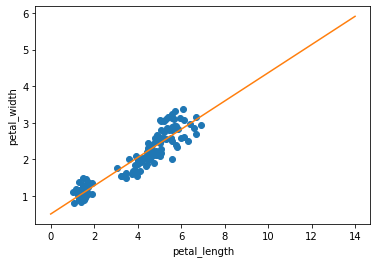

In [42]:
import statsmodels.api as sm

#linear regression
#Case 1:  X is the variable petal_length, and Y is the variable petal_width, in the iris_dna dataframe
X=iris_dna[["petal_length"]]
Y=iris_dna[["petal_width"]]
plot.plot(X,Y, "o")
X["intercept"]=1
result1 = sm.OLS(Y, X).fit()
a,b=result1.params[0],result1.params[1]
print(a)
print(b)
plot.plot(np.arange(15),[a*x+b for x in np.arange(15)])
plot.xlabel("petal_length")
plot.ylabel("petal_width")
plot.show()